In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN

In [2]:
data_1 = TabularDataset('Anti-Sa-LH - AutoML_2.csv')
#data=data.drop(['Anti_Sa'], axis=1)
data_1.head()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Hp,Ep,Length,Hydrophobic residue%,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Anti_Sa,Label
0,0.231,0.269,26,0.500,0.349390,0.417308,1.08,0.07,8.0,11.79,...,38.462,42.308,11.538,61.538,38.462,30.769,30.769,0.000,3.995408,1
1,0.250,0.292,24,0.125,0.210349,-0.147917,0.26,2.45,5.0,10.79,...,25.000,4.167,41.667,25.000,75.000,66.667,58.333,8.333,116.038004,2
2,0.318,0.545,22,0.455,0.281466,0.397727,0.92,0.17,3.0,10.43,...,40.909,31.818,4.545,54.545,45.455,31.818,22.727,9.091,98.780882,2
3,0.360,0.320,25,0.440,0.369713,0.278400,1.11,0.46,4.0,10.37,...,32.000,36.000,8.000,48.000,52.000,36.000,28.000,8.000,98.803891,2
4,0.133,0.400,45,0.400,0.187799,0.102000,0.58,0.71,12.0,12.05,...,42.222,28.889,6.667,51.111,48.889,35.556,31.111,4.444,4.533390,1


# BorderlineSMOTE

In [3]:
Feature=pd.DataFrame(data_1.drop(['Anti_Sa','Label'], axis=1))
Lab=data_1['Label']
Lab=pd.DataFrame(Lab)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
smo = BorderlineSMOTE(random_state=42)
x_smo, y_smo = smo.fit_resample(Feature,Lab)
x_smo=pd.DataFrame(x_smo)
smo=pd.merge(x_smo,y_smo,left_index=True, right_index=True)
smo

,Hp,Ep,Length,Hydrophobic residue%,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,0.231000,0.269000,26,0.500000,0.349390,0.417308,1.080000,0.070000,8.000000,11.790000,...,15.385000,38.462000,42.308000,11.538000,61.538000,38.462000,30.769000,30.769000,0.000000,1
1,0.250000,0.292000,24,0.125000,0.210349,-0.147917,0.260000,2.450000,5.000000,10.790000,...,20.833000,25.000000,4.167000,41.667000,25.000000,75.000000,66.667000,58.333000,8.333000,2
2,0.318000,0.545000,22,0.455000,0.281466,0.397727,0.920000,0.170000,3.000000,10.430000,...,22.727000,40.909000,31.818000,4.545000,54.545000,45.455000,31.818000,22.727000,9.091000,2
3,0.360000,0.320000,25,0.440000,0.369713,0.278400,1.110000,0.460000,4.000000,10.370000,...,16.000000,32.000000,36.000000,8.000000,48.000000,52.000000,36.000000,28.000000,8.000000,2
4,0.133000,0.400000,45,0.400000,0.187799,0.102000,0.580000,0.710000,12.000000,12.050000,...,33.333000,42.222000,28.889000,6.667000,51.111000,48.889000,35.556000,31.111000,4.444000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4600,0.354172,0.340473,20,0.479764,0.365759,0.182062,2.134475,-0.050657,-0.058279,0.322931,...,25.000000,28.511824,25.000000,25.000000,46.488176,53.511824,46.488176,42.976352,3.511824,3
4601,0.154601,0.348796,31,0.452000,0.453608,0.284000,0.497027,-0.303969,-0.434581,0.201646,...,41.935000,58.065000,35.161449,6.129449,60.967549,39.032451,22.903451,16.129000,6.774451,3
4602,0.505349,0.200000,10,0.214281,0.244496,-0.128074,4.353036,0.251397,0.063621,0.533546,...,19.286881,20.000000,10.534853,20.000000,40.000000,60.000000,50.178266,50.178266,0.000000,3
4603,0.551426,0.446501,11,0.359274,0.384743,0.072147,0.719436,2.124610,4.248751,12.400879,...,0.207293,26.971472,9.543271,17.428201,36.307451,63.692549,37.343913,37.136621,0.207293,3


In [5]:
data=smo

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# AutoGluon

In [6]:
train_data,test_data=train_test_split(data, test_size=0.2)
train_data.head()

,Hp,Ep,Length,Hydrophobic residue%,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
4279,0.405242,0.250986,21,0.351834,0.168036,0.088301,3.187019,0.096648,-0.181605,0.286527,...,29.651217,41.673483,25.913963,9.260929,37.043322,62.956678,37.935836,32.412554,5.523282,2
4275,0.275617,0.528815,17,0.647000,0.119729,0.487147,1.456864,-0.226198,0.037927,0.245260,...,29.412000,35.294000,29.412000,25.498645,64.706000,35.294000,29.412000,29.412000,0.000000,2
2173,0.059000,0.529000,17,0.412000,0.251805,0.531765,0.504706,-0.277059,-0.220000,0.271765,...,35.294000,52.941000,11.765000,11.765000,64.706000,35.294000,23.529000,23.529000,0.000000,3
2475,0.444000,0.444000,9,0.667000,0.402472,0.752222,4.223333,0.265556,0.718889,0.167778,...,0.000000,0.000000,0.000000,55.556000,55.556000,44.444000,44.444000,44.444000,0.000000,1
2354,0.038000,0.269000,26,0.308000,0.095122,0.153077,3.506538,0.020385,-0.221154,0.285769,...,42.308000,46.154000,26.923000,7.692000,46.154000,53.846000,30.769000,23.077000,7.692000,3


In [7]:
label='Label'
print("Summary of antisa activity coulum: \n", train_data['Label'].describe())

Summary of antisa activity coulum: 
 count    3684.000000
mean        1.994300
std         0.816754
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Label, dtype: float64


/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
print("Summary of antisa activity coulum: \n", test_data['Label'].describe())

Summary of antisa activity coulum: 
 count    921.000000
mean       2.022801
std        0.815956
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Label, dtype: float64


In [9]:
save_path = 'antisa'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data, num_bag_folds=5, num_bag_sets=1, num_stack_levels=1, presets='best_quality')
results = predictor.fit_summary()

Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "antisa/"
AutoGluon Version:  0.2.0
Train Data Rows:    3684
Train Data Columns: 94
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [2, 3, 1]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5262.88 MB
	Train Data (Original)  Memory Usage: 2.77 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator.

Fitting model: ExtraTreesEntr_BAG_L1 ...
		Model class <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> does not support out-of-fold prediction generation.
Detailed Traceback:
Traceback (most recent call last):
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 924, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 894, in _train_single
    model.fit(X=X, y=y, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/abstract/abstract_model.py", line 411, in fit
    self._fit(**kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 142, in _fit
    super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages

Detailed Traceback:
Traceback (most recent call last):
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 924, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 894, in _train_single
    model.fit(X=X, y=y, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/abstract/abstract_model.py", line 411, in fit
    self._fit(**kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 142, in _fit
    super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 160, in _fit
    self._fit_single(X=X, y=y, model_base=model_base, use_child_oof=use_child_oof, tim

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.721498       4.090077  1493.592842                0.001133           0.649688            3       True         18
1          LightGBM_BAG_L2   0.720955       3.780036  1026.871863                0.050451          47.578774            2       True         14
2        LightGBMXT_BAG_L2   0.720955       3.782682  1028.109042                0.053097          48.815953            2       True         13
3          CatBoost_BAG_L2   0.720141       3.749594  1050.824257                0.020009          71.531168            2       True         15
4     LightGBMLarge_BAG_L2   0.718241       3.965387  1325.017259                0.235802         345.724170            2       True         17
5      WeightedEnsemble_L2   0.714712       2.979619   886.783660         

In [10]:
y_test = test_data[label]
test_data_nolab= test_data.drop(columns=[label])
test_data_nolab.head()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Hp,Ep,Length,Hydrophobic residue%,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,MSWHIM3,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.
1261,0.167000,0.556000,18,0.389000,0.113014,0.265556,4.392222,0.122222,-0.023889,0.335000,...,0.067778,33.333,38.889,11.111,11.111,50.000,50.000,33.333,33.333,0.000
261,0.595000,0.081000,37,0.405000,0.100678,0.038108,2.972703,-0.112703,-0.254595,0.327568,...,-0.122162,37.838,45.946,29.730,5.405,51.351,48.649,35.135,29.730,5.405
4519,0.330502,0.264271,11,0.789954,0.400909,0.370000,0.253333,-0.403333,-0.060000,0.243333,...,-0.120000,33.333,33.333,33.333,33.333,66.667,33.333,33.333,33.333,0.000
525,0.025000,0.350000,40,0.475000,0.087062,0.407500,1.298500,-0.234250,-0.432750,0.242000,...,-0.419250,52.500,70.000,30.000,7.500,62.500,37.500,17.500,15.000,2.500
1939,0.125000,0.500000,8,0.625000,0.400567,0.446250,2.026250,-0.045000,-0.183750,-0.095000,...,-0.188750,0.000,37.500,50.000,0.000,50.000,50.000,25.000,12.500,12.500


In [11]:
predictor=TabularPredictor.load(save_path)

y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
print("GT: \n", y_test)
performance = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Evaluation: accuracy on test data: 0.7209554831704669
Evaluations on test data:
{
    "accuracy": 0.7209554831704669,
    "balanced_accuracy": 0.7196554014377359,
    "mcc": 0.5823230386750036
}


Predictions: 
 1261    1
261     1
4519    3
525     1
1939    3
       ..
2023    1
2471    1
675     1
2880    2
1378    3
Name: Label, Length: 921, dtype: int64
GT: 
 1261    1
261     1
4519    3
525     1
1939    3
       ..
2023    1
2471    1
675     1
2880    3
1378    3
Name: Label, Length: 921, dtype: int64


In [12]:
predictor.leaderboard(test_data,extra_metrics=['accuracy',
                                               'f1_macro','f1_micro',
                                               'roc_auc_ovo_macro',
                                               'precision_macro','precision_micro',
                                               'recall_macro','recall_micro'], silent=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,model,score_test,accuracy,f1_macro,f1_micro,roc_auc_ovo_macro,precision_macro,precision_micro,recall_macro,recall_micro,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L2,0.723127,0.723127,0.721224,0.723127,0.865560,0.723637,0.723127,0.721864,0.723127,0.720955,4.444053,3.782682,1028.109042,0.098501,0.053097,48.815953,2,True,13
1,LightGBM_BAG_L2,0.723127,0.723127,0.721224,0.723127,0.865560,0.723637,0.723127,0.721864,0.723127,0.720955,4.444287,3.780036,1026.871863,0.098735,0.050451,47.578774,2,True,14
2,WeightedEnsemble_L3,0.720955,0.720955,0.718989,0.720955,0.865674,0.721649,0.720955,0.719655,0.720955,0.721498,5.199419,4.090077,1493.592842,0.003864,0.001133,0.649688,3,True,18
3,LightGBMLarge_BAG_L2,0.711183,0.711183,0.709481,0.711183,0.865398,0.710945,0.711183,0.710012,0.711183,0.718241,4.967617,3.965387,1325.017259,0.622064,0.235802,345.724170,2,True,17
4,NeuralNetMXNet_BAG_L2,0.707926,0.707926,0.706100,0.707926,0.861673,0.706371,0.707926,0.706563,0.707926,0.704397,5.308724,4.517790,1018.026195,0.963172,0.788205,38.733105,2,True,16
5,NeuralNetFastAI_BAG_L2,0.701412,0.701412,0.698864,0.701412,0.860013,0.700511,0.701412,0.699684,0.701412,0.706026,4.968813,4.313393,1006.781572,0.623261,0.583808,27.488483,2,True,12
6,WeightedEnsemble_L2,0.700326,0.700326,0.698421,0.700326,0.853668,0.699268,0.700326,0.698816,0.700326,0.714712,3.666784,2.979619,886.783660,0.005662,0.001126,0.678476,2,True,9
7,CatBoost_BAG_L2,0.698154,0.698154,0.695807,0.698154,0.859590,0.697743,0.698154,0.696586,0.698154,0.720141,4.376256,3.749594,1050.824257,0.030704,0.020009,71.531168,2,True,15
8,LightGBMLarge_BAG_L1,0.688382,0.688382,0.686471,0.688382,0.848132,0.687907,0.688382,0.686841,0.688382,0.686211,1.422578,0.705369,415.871844,1.422578,0.705369,415.871844,1,True,8
9,LightGBM_BAG_L1,0.687296,0.687296,0.685706,0.687296,0.835434,0.686584,0.687296,0.685952,0.687296,0.671553,0.514514,0.261374,93.177345,0.514514,0.261374,93.177345,1,True,5


In [13]:
model_best=predictor.get_model_best()
model_best

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'WeightedEnsemble_L3'

In [14]:
model_pred=predictor.predict(test_data_nolab,model=model_best)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


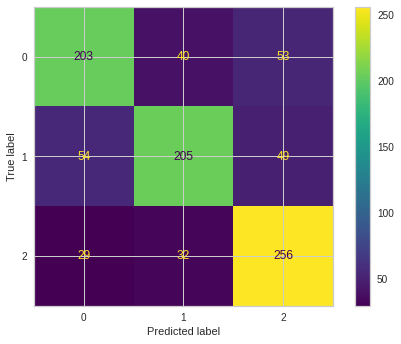

In [15]:
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_spam
from yellowbrick.datasets import load_credit
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#AUC_fig=ROCAUC(model_best,test_data_nolab, test_data[label],classes=["No acvtivity","Activity"])
#RocCurveDisplay.from_predictions(y_test, model_pred)
cm=confusion_matrix(y_test,model_pred)
cm_display=ConfusionMatrixDisplay(cm).plot()

In [16]:
y_probas=predictor.predict_proba(test_data_nolab)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/roo/anaconda3/lib/python3.8/site-packages/scikitplot/plotters.py:33: DeprecationWarning: This module was deprecated in version 0.3.0 and its functions are spread throughout different modules. Please check the documentation and update your function calls as soon as possible. This module will be removed in 0.4.0
  warnings.warn("This module was deprecated in version 0.3.0 and its functions "
/home/roo/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, ca

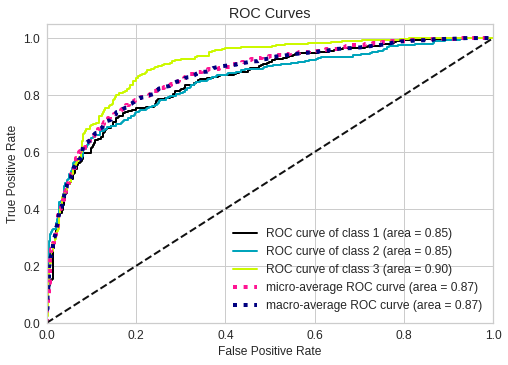

In [17]:
#AUC-figure1
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test,y_probas)
plt.show()

In [18]:
pd.set_option('max_row',100)
importance=pd.DataFrame(predictor.feature_importance(test_data))
importance

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Computing feature importance via permutation shuffling for 94 features using 921 rows with 3 shuffle sets...
	1463.73s	= Expected runtime (487.91s per shuffle set)
	684.66s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Length,0.080347,0.010694,0.002926,3,0.141623,0.019072
Aliphatic_Mole.,0.062613,0.002732,0.000317,3,0.078270,0.046956
Small_Mole.,0.055013,0.004388,0.001057,3,0.080157,0.029868
Tiny_Mole.,0.048498,0.004896,0.001690,3,0.076553,0.020443
Charged_Mole.,0.045603,0.011336,0.009991,3,0.110558,-0.019353
NonPolar_Mole.,0.043793,0.003490,0.001055,3,0.063793,0.023793
Polar_Mole.,0.043431,0.004343,0.001658,3,0.068318,0.018545
Aromatic_Mole.,0.038364,0.006362,0.004521,3,0.074819,0.001909
Basic_Mole.,0.035469,0.006545,0.005580,3,0.072971,-0.002033
Acidic_Mole.,0.030040,0.005131,0.004793,3,0.059442,0.000638


In [19]:
importance.to_csv('importance.csv',sep=',',index=True,header=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
antidata_neg = TabularDataset('neg_dataset.csv')
y_pred_neg= predictor.predict(antidata_neg)
print("Predictions: \n", y_pred_neg)
print("GT: \n", y_pred_neg)
percent_neg=predictor.predict_proba(antidata_neg)
print(percent_neg)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: neg_dataset.csv | Columns = 94 / 94 | Rows = 1300 -> 1300


Predictions: 
 0       3
1       3
2       3
3       3
4       3
       ..
1295    1
1296    3
1297    3
1298    3
1299    3
Name: Label, Length: 1300, dtype: int64
GT: 
 0       3
1       3
2       3
3       3
4       3
       ..
1295    1
1296    3
1297    3
1298    3
1299    3
Name: Label, Length: 1300, dtype: int64
             1         2         3
0     0.156933  0.098079  0.744988
1     0.285712  0.130124  0.584165
2     0.122670  0.091240  0.786090
3     0.258655  0.155520  0.585824
4     0.172953  0.153739  0.673308
...        ...       ...       ...
1295  0.496214  0.244500  0.259286
1296  0.325397  0.179083  0.495519
1297  0.285252  0.193909  0.520838
1298  0.112306  0.119130  0.768564
1299  0.193008  0.121407  0.685584

[1300 rows x 3 columns]


In [ ]:
antidata = TabularDataset('Sa_seq-feature.csv')
y_pred= predictor.predict(antidata)
print("Predictions: \n", y_pred)
print("GT: \n", y_pred)
percent=predictor.predict_proba(antidata)
print(percent)

In [22]:
y_pred_neg.to_csv('pred_neg.csv',sep=',',index=True,header=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
y_pred.to_csv('antiperd.csv',sep=',',index=True,header=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
percent.to_csv('percent.csv',sep=',',index=True,header=True)

In [23]:
data.to_csv('smo_2.csv')

# Deleted AA compostion and negative feature

In [25]:
data_de = TabularDataset('smo_2_de.csv')
#data=data.drop(['Anti_Sa'], axis=1)
data_de.head()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: smo_2_de.csv | Columns = 66 / 66 | Rows = 4606 -> 4606


,Hp,Ep,Length,Hydrophobic residue%,miuH,H,Normalized Hydrophobic Moment,Isoelectric Point,Penetration Depth,Tilt Angle,...,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,BLOSUM8,BLOSUM9,BLOSUM10,MSWHIM2,MSWHIM3,Label
0,1.000,1.000,1,1.000,1.000000,1.000000,1.00,1.00,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
1,0.231,0.269,26,0.500,0.349390,0.417308,1.08,11.79,13.0,86.0,...,-0.180385,0.114231,0.130769,0.243846,-0.030385,0.062692,-0.074231,0.488077,-0.073846,2.0
2,0.250,0.292,24,0.125,0.210349,-0.147917,0.26,10.79,30.0,132.0,...,0.362083,0.293750,-0.067500,0.348750,0.045000,0.159167,0.031250,0.310833,-0.243333,2.0
3,0.318,0.545,22,0.455,0.281466,0.397727,0.92,10.43,18.0,121.0,...,-0.130000,0.035000,0.017727,0.088636,-0.068182,0.013182,-0.146818,0.414091,-0.161364,2.0
4,0.360,0.320,25,0.440,0.369713,0.278400,1.11,10.37,27.0,42.0,...,-0.034800,0.252800,0.164800,0.084800,0.068800,0.010800,-0.041600,0.384400,-0.123600,1.0


In [26]:
data=data_de

train_data,test_data=train_test_split(data, test_size=0.2)

save_path = 'antisa'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data, num_bag_folds=5, num_bag_sets=1, num_stack_levels=1, presets='best_quality')
results = predictor.fit_summary()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "antisa/"
AutoGluon Version:  0.2.0
Train Data Rows:    3684
Train Data Columns: 65
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == float, but few unique label-values observed and label-values can be converted to int).
	3 unique label values:  [2.0, 1.0, 3.0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Coun

Fitting model: ExtraTreesEntr_BAG_L1 ...
		Model class <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> does not support out-of-fold prediction generation.
Detailed Traceback:
Traceback (most recent call last):
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 924, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 894, in _train_single
    model.fit(X=X, y=y, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/abstract/abstract_model.py", line 411, in fit
    self._fit(**kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 142, in _fit
    super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages

Detailed Traceback:
Traceback (most recent call last):
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 924, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 894, in _train_single
    model.fit(X=X, y=y, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/abstract/abstract_model.py", line 411, in fit
    self._fit(**kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 142, in _fit
    super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 160, in _fit
    self._fit_single(X=X, y=y, model_base=model_base, use_child_oof=use_child_oof, tim

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.570459       3.217488  788.687560                0.001097           0.652413            3       True         18
1     LightGBMLarge_BAG_L2   0.570187       3.201318  748.262511                0.562030         315.875368            2       True         17
2          CatBoost_BAG_L2   0.562585       2.654360  472.159778                0.015073          39.772636            2       True         15
3     LightGBMLarge_BAG_L1   0.554982       0.220505  175.424663                0.220505         175.424663            1       True          8
4      WeightedEnsemble_L2   0.554982       0.221614  176.074519                0.001108           0.649856            2       True          9
5          LightGBM_BAG_L2   0.554982       2.669237  461.396594                

In [27]:
y_test = test_data[label]
test_data_nolab= test_data.drop(columns=[label])

predictor=TabularPredictor.load(save_path)

y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
print("GT: \n", y_test)
performance = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Evaluation: accuracy on test data: 0.5086767895878525
Evaluations on test data:
{
    "accuracy": 0.5086767895878525,
    "balanced_accuracy": 0.508455547269865,
    "mcc": 0.2634499438641151
}


Predictions: 
 489     3.0
2835    3.0
4227    3.0
3474    2.0
3478    2.0
       ... 
4049    2.0
2175    3.0
4183    2.0
1247    2.0
24      1.0
Name: Label, Length: 922, dtype: float64
GT: 
 489     3.0
2835    1.0
4227    2.0
3474    1.0
3478    3.0
       ... 
4049    2.0
2175    3.0
4183    2.0
1247    3.0
24      2.0
Name: Label, Length: 922, dtype: float64


In [28]:
predictor.leaderboard(test_data,extra_metrics=['accuracy',
                                               'f1_macro','f1_micro',
                                               'roc_auc_ovo_macro',
                                               'precision_macro','precision_micro',
                                               'recall_macro','recall_micro'], silent=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,model,score_test,accuracy,f1_macro,f1_micro,roc_auc_ovo_macro,precision_macro,precision_micro,recall_macro,recall_micro,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI_BAG_L2,0.519523,0.519523,0.517907,0.519523,0.689830,0.518514,0.519523,0.519484,0.519523,0.550367,3.050363,3.106862,458.920035,0.511354,0.467574,26.532892,2,True,12
1,LightGBMLarge_BAG_L1,0.517354,0.517354,0.515250,0.517354,0.695711,0.516154,0.517354,0.517486,0.517354,0.554982,0.550873,0.220505,175.424663,0.550873,0.220505,175.424663,1,True,8
2,WeightedEnsemble_L2,0.517354,0.517354,0.515250,0.517354,0.695711,0.516154,0.517354,0.517486,0.517354,0.554982,0.553788,0.221614,176.074519,0.002915,0.001108,0.649856,2,True,9
3,CatBoost_BAG_L2,0.514100,0.514100,0.510739,0.514100,0.695720,0.512062,0.514100,0.514011,0.514100,0.562585,2.565880,2.654360,472.159778,0.026871,0.015073,39.772636,2,True,15
4,NeuralNetMXNet_BAG_L2,0.514100,0.514100,0.511038,0.514100,0.690020,0.512169,0.514100,0.513270,0.514100,0.545751,3.442840,3.447555,472.241206,0.903831,0.808267,39.854064,2,True,16
5,NeuralNetFastAI_BAG_L1,0.513015,0.513015,0.511111,0.513015,0.682570,0.512442,0.513015,0.512129,0.513015,0.517513,0.408000,0.414001,30.940166,0.408000,0.414001,30.940166,1,True,3
6,LightGBM_BAG_L2,0.511931,0.511931,0.508936,0.511931,0.695456,0.509737,0.511931,0.511879,0.511931,0.554982,2.593447,2.669237,461.396594,0.054438,0.029949,29.009451,2,True,14
7,LightGBMXT_BAG_L2,0.511931,0.511931,0.508936,0.511931,0.695456,0.509737,0.511931,0.511879,0.511931,0.554982,2.593476,2.669437,463.025651,0.054466,0.030149,30.638509,2,True,13
8,LightGBMLarge_BAG_L2,0.509761,0.509761,0.506894,0.509761,0.694830,0.507321,0.509761,0.509402,0.509761,0.570187,3.738599,3.201318,748.262511,1.199589,0.562030,315.875368,2,True,17
9,WeightedEnsemble_L3,0.508677,0.508677,0.505810,0.508677,0.695297,0.506277,0.508677,0.508456,0.508677,0.570459,3.768076,3.217488,788.687560,0.002606,0.001097,0.652413,3,True,18


In [29]:
model_best=predictor.get_model_best()
model_pred=predictor.predict(test_data_nolab,model=model_best)
model_best

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'WeightedEnsemble_L3'

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


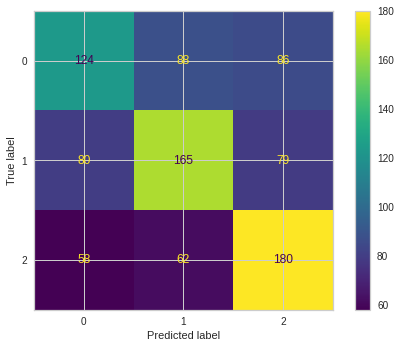

In [30]:
cm=confusion_matrix(y_test,model_pred)
cm_display=ConfusionMatrixDisplay(cm).plot()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/roo/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/home/roo/anaconda3/lib/python3.8/site-packages/scikitplot/metrics.py:284: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


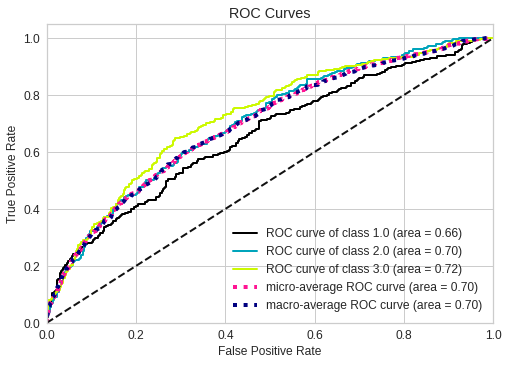

In [31]:
y_probas=predictor.predict_proba(test_data_nolab)
skplt.metrics.plot_roc_curve(y_test,y_probas)
plt.show()

In [32]:
pd.set_option('max_row',100)
importance=pd.DataFrame(predictor.feature_importance(test_data))
importance

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Computing feature importance via permutation shuffling for 65 features using 922 rows with 3 shuffle sets...
	731.08s	= Expected runtime (243.69s per shuffle set)
	320.6s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Length,4.013015e-02,0.007112,0.005154,3,0.080884,-0.000623
F1,4.338395e-03,0.006508,0.183772,3,0.041628,-0.032951
Normalized Hydrophobic Moment,3.615329e-03,0.007995,0.257749,3,0.049426,-0.042195
KF1,3.615329e-03,0.003809,0.120951,3,0.025441,-0.018211
BLOSUM3,3.615329e-03,0.001657,0.031707,3,0.013109,-0.005878
Boman Index,3.253796e-03,0.012508,0.348219,3,0.074927,-0.068420
BLOSUM9,1.446132e-03,0.002730,0.227834,3,0.017087,-0.014194
ProtFP3,7.230658e-04,0.003314,0.370901,3,0.019710,-0.018264
T4,7.230658e-04,0.003131,0.363917,3,0.018664,-0.017218
ST2,-7.401487e-17,0.001879,0.500000,3,0.010764,-0.010764


In [33]:
antidata_neg = TabularDataset('neg_dataset.csv')
y_pred_neg= predictor.predict(antidata_neg)
print("Predictions: \n", y_pred_neg)
print("GT: \n", y_pred_neg)
percent_neg=predictor.predict_proba(antidata_neg)
print(percent_neg)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: neg_dataset.csv | Columns = 94 / 94 | Rows = 1300 -> 1300


Predictions: 
 0       3.0
1       1.0
2       3.0
3       3.0
4       3.0
       ... 
1295    3.0
1296    3.0
1297    3.0
1298    3.0
1299    3.0
Name: Label, Length: 1300, dtype: float64
GT: 
 0       3.0
1       1.0
2       3.0
3       3.0
4       3.0
       ... 
1295    3.0
1296    3.0
1297    3.0
1298    3.0
1299    3.0
Name: Label, Length: 1300, dtype: float64
           1.0       2.0       3.0
0     0.192940  0.167994  0.639066
1     0.450391  0.209847  0.339763
2     0.156811  0.129034  0.714156
3     0.146979  0.086000  0.767021
4     0.112181  0.198024  0.689795
...        ...       ...       ...
1295  0.240166  0.104721  0.655114
1296  0.414560  0.109247  0.476193
1297  0.174692  0.152018  0.673290
1298  0.076298  0.099720  0.823982
1299  0.174079  0.378409  0.447512

[1300 rows x 3 columns]


In [34]:
antidata = TabularDataset('Sa_seq-feature.csv')
y_pred= predictor.predict(antidata)
print("Predictions: \n", y_pred)
print("GT: \n", y_pred)
percent=predictor.predict_proba(antidata)
print(percent)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: Sa_seq-feature.csv | Columns = 96 / 96 | Rows = 19 -> 19


Predictions: 
 0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     2.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    2.0
13    2.0
14    2.0
15    1.0
16    2.0
17    1.0
18    1.0
Name: Label, dtype: float64
GT: 
 0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     2.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    2.0
13    2.0
14    2.0
15    1.0
16    2.0
17    1.0
18    1.0
Name: Label, dtype: float64
         1.0       2.0       3.0
0   0.521925  0.325766  0.152309
1   0.459785  0.427849  0.112366
2   0.533577  0.358216  0.108207
3   0.492285  0.388025  0.119691
4   0.468027  0.376608  0.155366
5   0.496801  0.369072  0.134126
6   0.353040  0.528201  0.118759
7   0.512920  0.366172  0.120908
8   0.450163  0.424345  0.125492
9   0.488484  0.380711  0.130805
10  0.453336  0.421233  0.125431
11  0.511060  0.333416  0.155523
12  0.417210  0.476206  0.106583
13  0.387260  0.504759  0.107980
14  0.432423  0.454911  0.112666
15  0.444098  0

# feature

In [43]:
data_2 = TabularDataset('smo_2_f.csv')
#data=data.drop(['Anti_Sa'], axis=1)
data_2.head()

Loaded data from: smo_2_f.csv | Columns = 29 / 29 | Rows = 4606 -> 4606


,Length,Hydrophobic residue%,miuH,Normalized Hydrophobicity,Tilt Angle,Linear Moment,Propensity to in vitro Aggregation,Angle Subtended by the Hydrophobic Residues,PP2,PP3,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,1,1.000,1.000000,1.00,1.0,1.00,1.00,1.0,1.000000,1.000000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN
1,26,0.500,0.349390,0.07,86.0,0.28,18.63,30.0,-0.045385,0.266923,...,15.385,38.462,42.308,11.538,61.538,38.462,30.769,30.769,0.000,1.0
2,24,0.125,0.210349,2.45,132.0,0.33,0.00,20.0,-0.124583,0.375833,...,20.833,25.000,4.167,41.667,25.000,75.000,66.667,58.333,8.333,2.0
3,22,0.455,0.281466,0.17,121.0,0.21,67.42,80.0,-0.201818,0.130455,...,22.727,40.909,31.818,4.545,54.545,45.455,31.818,22.727,9.091,2.0
4,25,0.440,0.369713,0.46,42.0,0.25,71.21,80.0,-0.174400,0.149200,...,16.000,32.000,36.000,8.000,48.000,52.000,36.000,28.000,8.000,2.0


In [45]:
data=data_2

train_data,test_data=train_test_split(data, test_size=0.2)

save_path = 'antisa'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data, num_bag_folds=5, num_bag_sets=1, num_stack_levels=1, presets='best_quality')
results = predictor.fit_summary()

Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "antisa/"
AutoGluon Version:  0.2.0
Train Data Rows:    3684
Train Data Columns: 28
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == float, but few unique label-values observed and label-values can be converted to int).
	3 unique label values:  [2.0, 1.0, 3.0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    4239.77 MB
	Train Data (Original)  Memory Usage: 0.83 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stag

Fitting model: ExtraTreesEntr_BAG_L1 ...
		Model class <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> does not support out-of-fold prediction generation.
Detailed Traceback:
Traceback (most recent call last):
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 924, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 894, in _train_single
    model.fit(X=X, y=y, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/abstract/abstract_model.py", line 411, in fit
    self._fit(**kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 142, in _fit
    super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages

Detailed Traceback:
Traceback (most recent call last):
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 924, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 894, in _train_single
    model.fit(X=X, y=y, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/abstract/abstract_model.py", line 411, in fit
    self._fit(**kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 142, in _fit
    super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 160, in _fit
    self._fit_single(X=X, y=y, model_base=model_base, use_child_oof=use_child_oof, tim

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.725496       6.395609  650.777040                0.001174           0.661009            3       True         18
1          CatBoost_BAG_L2   0.721423       4.366078  472.626115                0.015409          27.928359            2       True         15
2     LightGBMLarge_BAG_L2   0.719522       4.570443  572.572464                0.219774         127.874708            2       True         17
3          LightGBM_BAG_L2   0.718165       4.400844  465.003319                0.050175          20.305563            2       True         14
4        LightGBMXT_BAG_L2   0.718165       4.401150  464.925234                0.050481          20.227478            2       True         13
5   NeuralNetFastAI_BAG_L2   0.717893       4.664641  466.017423                

In [46]:
y_test = test_data[label]
test_data_nolab= test_data.drop(columns=[label])

predictor=TabularPredictor.load(save_path)

y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
print("GT: \n", y_test)
performance = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Evaluation: accuracy on test data: 0.6843817787418656
Evaluations on test data:
{
    "accuracy": 0.6843817787418656,
    "balanced_accuracy": 0.6823115183028977,
    "mcc": 0.5260328986360331
}


Predictions: 
 489     3.0
2835    3.0
4227    3.0
3474    1.0
3478    1.0
       ... 
4049    1.0
2175    3.0
4183    2.0
1247    3.0
24      1.0
Name: Label, Length: 922, dtype: float64
GT: 
 489     1.0
2835    3.0
4227    2.0
3474    1.0
3478    1.0
       ... 
4049    2.0
2175    3.0
4183    2.0
1247    3.0
24      1.0
Name: Label, Length: 922, dtype: float64


In [47]:
predictor.leaderboard(test_data,extra_metrics=['accuracy',
                                               'f1_macro','f1_micro',
                                               'roc_auc_ovo_macro',
                                               'precision_macro','precision_micro',
                                               'recall_macro','recall_micro'], silent=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,model,score_test,accuracy,f1_macro,f1_micro,roc_auc_ovo_macro,precision_macro,precision_micro,recall_macro,recall_micro,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI_BAG_L2,0.696312,0.696312,0.694917,0.696312,0.834980,0.695904,0.696312,0.694759,0.696312,0.717893,5.615628,4.664641,466.017423,0.365022,0.313973,21.319667,2,True,12
1,CatBoost_BAG_L2,0.693059,0.693059,0.691398,0.693059,0.835862,0.692018,0.693059,0.691558,0.693059,0.721423,5.271640,4.366078,472.626115,0.021034,0.015409,27.928359,2,True,15
2,NeuralNetMXNet_BAG_L2,0.690889,0.690889,0.688565,0.690889,0.833891,0.689332,0.690889,0.688905,0.690889,0.714635,6.686467,5.701689,494.308438,1.435861,1.351020,49.610682,2,True,16
3,LightGBMXT_BAG_L2,0.688720,0.688720,0.686188,0.688720,0.835791,0.688178,0.688720,0.686392,0.688720,0.718165,5.347281,4.401150,464.925234,0.096675,0.050481,20.227478,2,True,13
4,LightGBM_BAG_L2,0.688720,0.688720,0.686188,0.688720,0.835791,0.688178,0.688720,0.686392,0.688720,0.718165,5.347718,4.400844,465.003319,0.097112,0.050175,20.305563,2,True,14
5,WeightedEnsemble_L2,0.686551,0.686551,0.684700,0.686551,0.832217,0.687298,0.686551,0.684349,0.686551,0.715721,3.571488,2.881579,275.090977,0.004142,0.001132,0.664543,2,True,9
6,LightGBMLarge_BAG_L2,0.686551,0.686551,0.684389,0.686551,0.835537,0.686222,0.686551,0.684501,0.686551,0.719522,5.825080,4.570443,572.572464,0.574474,0.219774,127.874708,2,True,17
7,WeightedEnsemble_L3,0.684382,0.684382,0.682229,0.684382,0.834759,0.683583,0.684382,0.682312,0.684382,0.725496,7.430671,6.395609,650.777040,0.003882,0.001174,0.661009,3,True,18
8,LightGBMLarge_BAG_L1,0.682213,0.682213,0.681335,0.682213,0.826978,0.682383,0.682213,0.680936,0.682213,0.688569,2.021893,0.884904,132.342131,2.021893,0.884904,132.342131,1,True,8
9,NeuralNetMXNet_BAG_L1,0.667028,0.667028,0.664292,0.667028,0.819436,0.665666,0.667028,0.664355,0.667028,0.678794,1.401479,1.497954,142.081592,1.401479,1.497954,142.081592,1,True,7


In [48]:
model_best=predictor.get_model_best()
model_pred=predictor.predict(test_data_nolab,model=model_best)
model_best

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'WeightedEnsemble_L3'

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


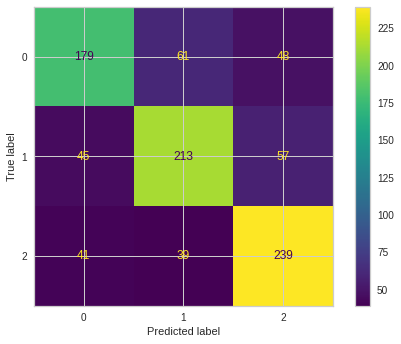

In [49]:
cm=confusion_matrix(y_test,model_pred)
cm_display=ConfusionMatrixDisplay(cm).plot()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/roo/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/home/roo/anaconda3/lib/python3.8/site-packages/scikitplot/metrics.py:284: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


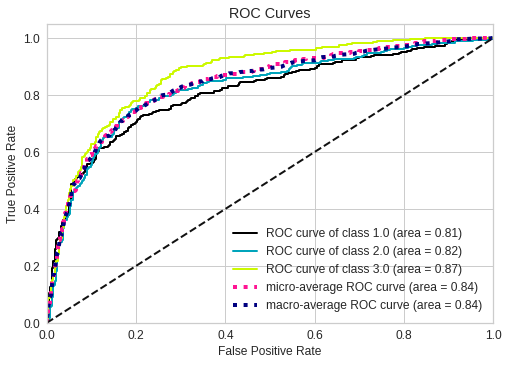

In [50]:
y_probas=predictor.predict_proba(test_data_nolab)
skplt.metrics.plot_roc_curve(y_test,y_probas)
plt.show()

In [51]:
pd.set_option('max_row',100)
importance=pd.DataFrame(predictor.feature_importance(test_data))
importance

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Computing feature importance via permutation shuffling for 28 features using 922 rows with 3 shuffle sets...
	628.89s	= Expected runtime (209.63s per shuffle set)
	261.26s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Length,0.121475,0.007821,0.000689,3,0.166291,0.076659
Aliphatic_Mole.,0.094360,0.003757,0.000264,3,0.115889,0.072831
Small_Mole.,0.090022,0.004728,0.000459,3,0.117112,0.062932
Tiny_Mole.,0.073030,0.003314,0.000343,3,0.092016,0.054043
Aromatic_Mole.,0.056761,0.006538,0.002196,3,0.094222,0.019299
Basic_Mole.,0.049168,0.003809,0.000997,3,0.070994,0.027343
Polar_Mole.,0.046999,0.008767,0.005700,3,0.097233,-0.003235
Charged_Mole.,0.046999,0.004383,0.001443,3,0.072116,0.021882
NonPolar_Mole.,0.044107,0.009224,0.007134,3,0.096964,-0.008750
Angle Subtended by the Hydrophobic Residues,0.018800,0.003314,0.005098,3,0.037786,-0.000187


In [52]:
antidata = TabularDataset('Sa_seq-feature.csv')
y_pred = predictor.predict(antidata)
print("Predictions: \n", y_pred)
print("GT: \n", y_pred)
percent=predictor.predict_proba(antidata)
print(percent)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: Sa_seq-feature.csv | Columns = 96 / 96 | Rows = 19 -> 19


Predictions: 
 0     1.0
1     1.0
2     2.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    2.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
Name: Label, dtype: float64
GT: 
 0     1.0
1     1.0
2     2.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    2.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
Name: Label, dtype: float64
         1.0       2.0       3.0
0   0.520367  0.275006  0.204627
1   0.466074  0.439706  0.094220
2   0.425302  0.479460  0.095237
3   0.608944  0.302358  0.088699
4   0.598745  0.304897  0.096359
5   0.609858  0.292422  0.097720
6   0.531012  0.358783  0.110204
7   0.593005  0.299958  0.107037
8   0.526088  0.196660  0.277252
9   0.586612  0.316988  0.096400
10  0.570726  0.326357  0.102918
11  0.579449  0.302909  0.117643
12  0.443556  0.460752  0.095692
13  0.541390  0.347775  0.110835
14  0.587429  0.304353  0.108218
15  0.573639  0

# Raw data

In [54]:
data_3 = TabularDataset('Anti-Sa-LH - AutoML_2.csv').drop(['Anti_Sa'], axis=1)
#data=data.drop(['Anti_Sa'], axis=1)
data_3.head()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: Anti-Sa-LH - AutoML_2.csv | Columns = 96 / 96 | Rows = 3825 -> 3825


,Hp,Ep,Length,Hydrophobic residue%,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,0.231,0.269,26,0.500,0.349390,0.417308,1.08,0.07,8.0,11.79,...,15.385,38.462,42.308,11.538,61.538,38.462,30.769,30.769,0.000,1
1,0.250,0.292,24,0.125,0.210349,-0.147917,0.26,2.45,5.0,10.79,...,20.833,25.000,4.167,41.667,25.000,75.000,66.667,58.333,8.333,2
2,0.318,0.545,22,0.455,0.281466,0.397727,0.92,0.17,3.0,10.43,...,22.727,40.909,31.818,4.545,54.545,45.455,31.818,22.727,9.091,2
3,0.360,0.320,25,0.440,0.369713,0.278400,1.11,0.46,4.0,10.37,...,16.000,32.000,36.000,8.000,48.000,52.000,36.000,28.000,8.000,2
4,0.133,0.400,45,0.400,0.187799,0.102000,0.58,0.71,12.0,12.05,...,33.333,42.222,28.889,6.667,51.111,48.889,35.556,31.111,4.444,1


In [55]:
data=data_3

train_data,test_data=train_test_split(data, test_size=0.2)

save_path = 'antisa'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data, num_bag_folds=5, num_bag_sets=1, num_stack_levels=1, presets='best_quality')
results = predictor.fit_summary()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "antisa/"
AutoGluon Version:  0.2.0
Train Data Rows:    3060
Train Data Columns: 94
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [2, 3, 1]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the d

Fitting model: ExtraTreesEntr_BAG_L1 ...
		Model class <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> does not support out-of-fold prediction generation.
Detailed Traceback:
Traceback (most recent call last):
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 924, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 894, in _train_single
    model.fit(X=X, y=y, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/abstract/abstract_model.py", line 411, in fit
    self._fit(**kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 142, in _fit
    super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages

Detailed Traceback:
Traceback (most recent call last):
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 924, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 894, in _train_single
    model.fit(X=X, y=y, **model_fit_kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/abstract/abstract_model.py", line 411, in fit
    self._fit(**kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 142, in _fit
    super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/home/roo/anaconda3/lib/python3.8/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 160, in _fit
    self._fit_single(X=X, y=y, model_base=model_base, use_child_oof=use_child_oof, tim

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3   0.647386       4.408190  1101.832391                0.001071           0.592454            3       True         18
1          CatBoost_BAG_L2   0.644444       3.532738   705.977799                0.017966          64.323325            2       True         15
2        LightGBMXT_BAG_L2   0.643137       3.561645   689.202677                0.046873          47.548203            2       True         13
3          LightGBM_BAG_L2   0.643137       3.563536   686.311733                0.048764          44.657259            2       True         14
4     LightGBMLarge_BAG_L2   0.643137       3.702840   923.034400                0.188068         281.379926            2       True         17
5    NeuralNetMXNet_BAG_L2   0.634314       5.024876   682.176865         

In [56]:
y_test = test_data[label]
test_data_nolab= test_data.drop(columns=[label])

predictor=TabularPredictor.load(save_path)

y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
print("GT: \n", y_test)
performance = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Evaluation: accuracy on test data: 0.596078431372549
Evaluations on test data:
{
    "accuracy": 0.596078431372549,
    "balanced_accuracy": 0.5684610835249687,
    "mcc": 0.38180533917735154
}


Predictions: 
 35      1
3726    1
88      3
1343    1
3290    3
       ..
2170    3
3649    1
2608    1
3732    3
1380    1
Name: Label, Length: 765, dtype: int64
GT: 
 35      1
3726    2
88      2
1343    2
3290    1
       ..
2170    1
3649    1
2608    1
3732    2
1380    1
Name: Label, Length: 765, dtype: int64


In [57]:
predictor.leaderboard(test_data,extra_metrics=['accuracy',
                                               'f1_macro','f1_micro',
                                               'roc_auc_ovo_macro',
                                               'precision_macro','precision_micro',
                                               'recall_macro','recall_micro'], silent=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,model,score_test,accuracy,f1_macro,f1_micro,roc_auc_ovo_macro,precision_macro,precision_micro,recall_macro,recall_micro,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetMXNet_BAG_L2,0.611765,0.611765,0.579001,0.611765,0.759808,0.591377,0.611765,0.584066,0.611765,0.634314,5.323123,5.024876,682.176865,1.659597,1.510104,40.522391,2,True,16
1,CatBoost_BAG_L2,0.606536,0.606536,0.574353,0.606536,0.761871,0.587937,0.606536,0.579724,0.606536,0.644444,3.694399,3.532738,705.977799,0.030872,0.017966,64.323325,2,True,15
2,LightGBMLarge_BAG_L2,0.605229,0.605229,0.569026,0.605229,0.751036,0.581523,0.605229,0.575895,0.605229,0.643137,4.158198,3.702840,923.034400,0.494671,0.188068,281.379926,2,True,17
3,NeuralNetFastAI_BAG_L2,0.603922,0.603922,0.578267,0.603922,0.752416,0.583347,0.603922,0.580750,0.603922,0.626144,4.272337,4.105447,663.331223,0.608810,0.590675,21.676749,2,True,12
4,LightGBMXT_BAG_L1,0.598693,0.598693,0.572036,0.598693,0.758754,0.587618,0.598693,0.574014,0.598693,0.625163,0.305467,0.163682,72.109291,0.305467,0.163682,72.109291,1,True,4
5,LightGBM_BAG_L1,0.598693,0.598693,0.572036,0.598693,0.758754,0.587618,0.598693,0.574014,0.598693,0.625163,0.305930,0.155060,72.006073,0.305930,0.155060,72.006073,1,True,5
6,LightGBMXT_BAG_L2,0.598693,0.598693,0.561438,0.598693,0.753185,0.576700,0.598693,0.569478,0.598693,0.643137,3.757132,3.561645,689.202677,0.093605,0.046873,47.548203,2,True,13
7,LightGBM_BAG_L2,0.598693,0.598693,0.561438,0.598693,0.753185,0.576700,0.598693,0.569478,0.598693,0.643137,3.758588,3.563536,686.311733,0.095061,0.048764,44.657259,2,True,14
8,LightGBMLarge_BAG_L1,0.596078,0.596078,0.567100,0.596078,0.760716,0.583440,0.596078,0.570024,0.596078,0.632026,0.710971,0.274995,283.215643,0.710971,0.274995,283.215643,1,True,8
9,WeightedEnsemble_L2,0.596078,0.596078,0.567100,0.596078,0.760716,0.583440,0.596078,0.570024,0.596078,0.632026,0.713701,0.276038,283.822679,0.002731,0.001043,0.607037,2,True,9


In [58]:
model_best=predictor.get_model_best()
model_pred=predictor.predict(test_data_nolab,model=model_best)
model_best

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'WeightedEnsemble_L3'

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


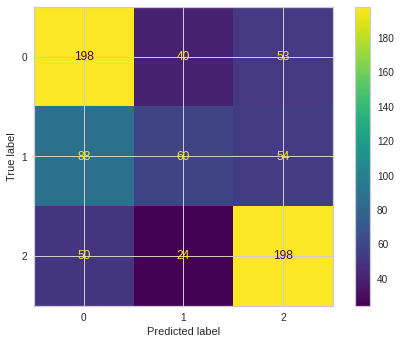

In [59]:
cm=confusion_matrix(y_test,model_pred)
cm_display=ConfusionMatrixDisplay(cm).plot()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/roo/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/home/roo/anaconda3/lib/python3.8/site-packages/scikitplot/metrics.py:284: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


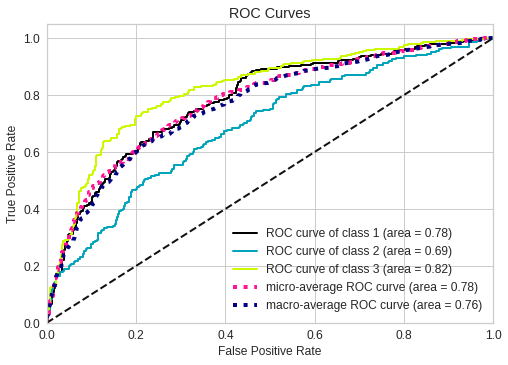

In [60]:
y_probas=predictor.predict_proba(test_data_nolab)
skplt.metrics.plot_roc_curve(y_test,y_probas)
plt.show()

In [61]:
pd.set_option('max_row',100)
importance=pd.DataFrame(predictor.feature_importance(test_data))
importance

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Computing feature importance via permutation shuffling for 94 features using 765 rows with 3 shuffle sets...
	1449.54s	= Expected runtime (483.18s per shuffle set)
	431.17s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Length,0.025272,0.007199,0.013000,3,0.066526,-0.015981
PP3,0.005229,0.002614,0.037090,3,0.020209,-0.009752
H,0.005229,0.002614,0.037090,3,0.020209,-0.009752
BLOSUM7,0.004357,0.004591,0.120951,3,0.030663,-0.021948
Polar_Mole.,0.003486,0.003994,0.134852,3,0.026369,-0.019398
Propensity to PPII coil,0.002614,0.002264,0.091752,3,0.015588,-0.010359
Amphiphilicity Index,0.002614,0.002264,0.091752,3,0.015588,-0.010359
BLOSUM9,0.002614,0.003458,0.160317,3,0.022432,-0.017203
VHSE4,0.002179,0.001997,0.099680,3,0.013620,-0.009263
VHSE3,0.002179,0.002721,0.149930,3,0.017771,-0.013414


In [62]:
antidata = TabularDataset('Sa_seq-feature.csv')
y_pred = predictor.predict(antidata)
print("Predictions: \n", y_pred)
print("GT: \n", y_pred)
percent=predictor.predict_proba(antidata)
print(percent)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: Sa_seq-feature.csv | Columns = 96 / 96 | Rows = 19 -> 19


Predictions: 
 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
Name: Label, dtype: int64
GT: 
 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
Name: Label, dtype: int64
           1         2         3
0   0.532118  0.253742  0.214140
1   0.467779  0.367896  0.164325
2   0.487724  0.351065  0.161212
3   0.486132  0.308590  0.205278
4   0.510512  0.289172  0.200316
5   0.506601  0.319762  0.173637
6   0.495351  0.312955  0.191694
7   0.519762  0.270163  0.210075
8   0.466835  0.254420  0.278745
9   0.528402  0.272305  0.199293
10  0.523567  0.267252  0.209182
11  0.503851  0.319933  0.176216
12  0.502856  0.272420  0.224724
13  0.490077  0.280464  0.229459
14  0.531109  0.289565  0.179327
15  0.493640  0.270232  0.236129
16  0.497417  0.296103  0.206480
17  0.504985  0.276573  0.218

# Regression

In [64]:
data_4= TabularDataset('Anti-Sa-LH - AutoML_reg.csv').drop(['Anti_Sa'], axis=1)
#data=data.drop(['Anti_Sa'], axis=1)
data_4.head()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: Anti-Sa-LH - AutoML_reg.csv | Columns = 96 / 96 | Rows = 3825 -> 3825


,Hp,Ep,Length,Hydrophobic residue%,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,0.231,0.269,26,0.500,0.349390,0.417308,1.08,0.07,8.0,11.79,...,15.385,38.462,42.308,11.538,61.538,38.462,30.769,30.769,0.000,1.998343
1,0.250,0.292,24,0.125,0.210349,-0.147917,0.26,2.45,5.0,10.79,...,20.833,25.000,4.167,41.667,25.000,75.000,66.667,58.333,8.333,6.858454
2,0.318,0.545,22,0.455,0.281466,0.397727,0.92,0.17,3.0,10.43,...,22.727,40.909,31.818,4.545,54.545,45.455,31.818,22.727,9.091,6.626160
3,0.360,0.320,25,0.440,0.369713,0.278400,1.11,0.46,4.0,10.37,...,16.000,32.000,36.000,8.000,48.000,52.000,36.000,28.000,8.000,6.626496
4,0.133,0.400,45,0.400,0.187799,0.102000,0.58,0.71,12.0,12.05,...,33.333,42.222,28.889,6.667,51.111,48.889,35.556,31.111,4.444,2.180590


In [65]:
data=data_4

train_data,test_data=train_test_split(data, test_size=0.2)

save_path = 'antisa'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data, num_bag_folds=5, num_bag_sets=1, num_stack_levels=1, presets='best_quality')
results = predictor.fit_summary()

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "antisa/"
AutoGluon Version:  0.2.0
Train Data Rows:    3060
Train Data Columns: 94
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (8.0, 1.0, 5.50977, 2.21403)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preproce

Fitting model: NeuralNetMXNet_BAG_L1 ...
	-1.8728	 = Validation root_mean_squared_error score
	56.08s	 = Training runtime
	1.48s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ...
	-1.7952	 = Validation root_mean_squared_error score
	79.74s	 = Training runtime
	0.09s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-1.7346	 = Validation root_mean_squared_error score
	0.47s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: KNeighborsUnif_BAG_L2 ...
	-1.911	 = Validation root_mean_squared_error score
	0.01s	 = Training runtime
	0.34s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L2 ...
	-1.8692	 = Validation root_mean_squared_error score
	0.01s	 = Training runtime
	0.34s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L2 ...
	-1.7875	 = Validation root_mean_squared_error score
	12.59s	 = Training runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ...
	-1.7875	 = Validation root_mean_squared_error score
	14.1s	 = Training

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -1.734573       2.776418  306.749660                0.000921           0.465005            2       True          9
1      WeightedEnsemble_L3  -1.747280       4.987579  360.787446                0.000896           0.492504            3       True         18
2          CatBoost_BAG_L2  -1.754743       3.141110  328.012993                0.013984          21.722951            2       True         14
3          LightGBM_BAG_L1  -1.776187       0.073148   24.748433                0.073148          24.748433            1       True          4
4        LightGBMXT_BAG_L1  -1.776187       0.076521   26.213137                0.076521          26.213137            1       True          3
5          CatBoost_BAG_L1  -1.776935       0.056607   93.006646                

In [66]:
y_test = test_data[label]
test_data_nolab= test_data.drop(columns=[label])

predictor=TabularPredictor.load(save_path)

y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
print("GT: \n", y_test)
performance = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Evaluation: root_mean_squared_error on test data: -1.812031751967739
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -1.812031751967739,
    "mean_squared_error": -3.283459070139279,
    "mean_absolute_error": -1.4642977624212703,
    "r2": 0.3102880056012457,
    "pearsonr": 0.5570384428168992,
    "median_absolute_error": -1.287774401655518
}


Predictions: 
 35      4.274463
1022    6.698960
1908    5.209187
1787    5.314142
2126    5.270229
          ...   
3525    7.075922
2857    3.117788
2173    6.513482
2563    7.410780
1079    6.732883
Name: Label, Length: 765, dtype: float32
GT: 
 35      2.891909
1022    6.645796
1908    5.000000
1787    2.225966
2126    2.829007
          ...   
3525    4.965784
2857    2.017922
2173    8.000000
2563    6.643856
1079    7.000000
Name: Label, Length: 765, dtype: float64


In [67]:
lb = predictor.leaderboard(test_data, extra_metrics=['mean_squared_error', 'mean_absolute_error', 'median_absolute_error', 'r2', 'pearsonr'], silent=True)
lb

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,model,score_test,mean_squared_error,mean_absolute_error,median_absolute_error,r2,pearsonr,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L2,-1.793021,-3.214924,-1.458262,-1.205701,0.324684,0.570872,-1.787451,2.986685,3.151999,320.387390,0.039749,0.024873,14.097348,2,True,13
1,LightGBMXT_BAG_L2,-1.793021,-3.214924,-1.458262,-1.205701,0.324684,0.570872,-1.787451,2.986802,3.151427,318.875897,0.039866,0.024302,12.585855,2,True,12
2,CatBoost_BAG_L2,-1.805549,-3.260009,-1.463269,-1.229211,0.315214,0.561719,-1.754743,2.972323,3.141110,328.012993,0.025387,0.013984,21.722951,2,True,14
3,LightGBMLarge_BAG_L2,-1.808174,-3.269494,-1.472999,-1.277384,0.313221,0.560009,-1.810728,3.046423,3.163499,362.222064,0.099487,0.036373,55.932022,2,True,17
4,WeightedEnsemble_L2,-1.812032,-3.283459,-1.464298,-1.287774,0.310288,0.557038,-1.734573,2.828204,2.776418,306.749660,0.006870,0.000921,0.465005,2,True,9
5,WeightedEnsemble_L3,-1.812815,-3.286298,-1.463876,-1.240525,0.309692,0.556668,-1.747280,4.774626,4.987579,360.787446,0.003199,0.000896,0.492504,3,True,18
6,NeuralNetFastAI_BAG_L2,-1.818253,-3.306044,-1.443959,-1.204201,0.305544,0.557365,-1.828722,3.499580,3.633479,328.578866,0.552644,0.506353,22.288824,2,True,15
7,CatBoost_BAG_L1,-1.819463,-3.310446,-1.480716,-1.309970,0.304619,0.552362,-1.776935,0.033146,0.056607,93.006646,0.033146,0.056607,93.006646,1,True,5
8,LightGBMLarge_BAG_L1,-1.820493,-3.314196,-1.475517,-1.298036,0.303832,0.551418,-1.795167,0.242981,0.086334,79.736752,0.242981,0.086334,79.736752,1,True,8
9,LightGBMXT_BAG_L1,-1.836523,-3.372818,-1.480406,-1.259778,0.291518,0.540171,-1.776187,0.125927,0.076521,26.213137,0.125927,0.076521,26.213137,1,True,3


In [68]:
model_best=predictor.get_model_best()
model_pred=predictor.predict(test_data_nolab,model=model_best)
model_best

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'WeightedEnsemble_L2'

In [69]:
pd.set_option('max_row',100)
importance=pd.DataFrame(predictor.feature_importance(test_data))
importance

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Computing feature importance via permutation shuffling for 94 features using 765 rows with 3 shuffle sets...
	805.69s	= Expected runtime (268.56s per shuffle set)
	159.24s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Length,0.139854,0.010117,0.000870,3,0.197827,0.081881
Small_Mole.,0.036709,0.016521,0.030684,3,0.131377,-0.057960
Aliphatic_Mole.,0.032056,0.002535,0.001039,3,0.046585,0.017527
NonPolar_Mole.,0.030132,0.010702,0.019785,3,0.091457,-0.031192
Polar_Mole.,0.029257,0.010987,0.021968,3,0.092216,-0.033701
Acidic_Mole.,0.024489,0.002992,0.002470,3,0.041635,0.007343
Tiny_Mole.,0.023346,0.003086,0.002887,3,0.041030,0.005663
Aromatic_Mole.,0.022354,0.004514,0.006662,3,0.048222,-0.003515
miuH,0.021112,0.005643,0.011498,3,0.053447,-0.011223
Basic_Mole.,0.019717,0.000842,0.000303,3,0.024539,0.014894


In [70]:
antidata = TabularDataset('Sa_seq-feature.csv')
y_pred= predictor.predict(antidata)
print("Predictions: \n", y_pred)
print("GT: \n", y_pred)
percent=predictor.predict_proba(antidata)
print(percent)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: Sa_seq-feature.csv | Columns = 96 / 96 | Rows = 19 -> 19


Predictions: 
 0     4.692006
1     5.416228
2     5.330377
3     5.236102
4     5.201509
5     4.961528
6     4.562159
7     5.133079
8     5.286561
9     5.179988
10    5.065434
11    4.966520
12    5.390161
13    5.246172
14    5.277085
15    5.011658
16    5.321583
17    5.083601
18    5.344195
Name: Label, dtype: float32
GT: 
 0     4.692006
1     5.416228
2     5.330377
3     5.236102
4     5.201509
5     4.961528
6     4.562159
7     5.133079
8     5.286561
9     5.179988
10    5.065434
11    4.966520
12    5.390161
13    5.246172
14    5.277085
15    5.011658
16    5.321583
17    5.083601
18    5.344195
Name: Label, dtype: float32
0     4.692006
1     5.416228
2     5.330377
3     5.236102
4     5.201509
5     4.961528
6     4.562159
7     5.133079
8     5.286561
9     5.179988
10    5.065434
11    4.966520
12    5.390161
13    5.246172
14    5.277085
15    5.011658
16    5.321583
17    5.083601
18    5.344195
Name: Label, dtype: float32


In [86]:
antidata_neg = TabularDataset('neg_dataset.csv')
y_pred_neg= predictor.predict(antidata_neg)
print("Predictions: \n", y_pred_neg)
print("GT: \n", y_pred_neg)
percent_neg=predictor.predict_proba(antidata_neg)
print(percent_neg)

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: neg_dataset.csv | Columns = 94 / 94 | Rows = 1300 -> 1300


Predictions: 
 0       6.985531
1       6.472439
2       7.009456
3       6.475916
4       6.734777
          ...   
1295    5.301234
1296    6.103255
1297    7.017791
1298    7.315882
1299    5.804076
Name: Label, Length: 1300, dtype: float32
GT: 
 0       6.985531
1       6.472439
2       7.009456
3       6.475916
4       6.734777
          ...   
1295    5.301234
1296    6.103255
1297    7.017791
1298    7.315882
1299    5.804076
Name: Label, Length: 1300, dtype: float32
0       6.985531
1       6.472439
2       7.009456
3       6.475916
4       6.734777
          ...   
1295    5.301234
1296    6.103255
1297    7.017791
1298    7.315882
1299    5.804076
Name: Label, Length: 1300, dtype: float32


In [85]:
antidata_neg = TabularDataset('neg_dataset.csv')
antidata_neg

/home/roo/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Loaded data from: neg_dataset.csv | Columns = 94 / 94 | Rows = 1300 -> 1300


,Hp,Ep,Length,Hydrophobic residue%,H,miuH,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,MSWHIM3,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.
0,0.200,0.400,5,0.600,0.968000,0.499346,0.58,0.96,-1,3.22,...,-0.410000,0.000,40.000,0.000,40.000,80.000,20.000,20.000,0.000,20.000
1,0.200,0.400,5,0.800,1.342000,0.626740,1.13,-0.12,0,3.50,...,-0.466000,0.000,40.000,0.000,40.000,100.000,0.000,0.000,0.000,0.000
2,0.200,0.600,5,0.800,1.000000,0.588032,1.60,-1.18,-1,3.22,...,-0.372000,20.000,20.000,20.000,40.000,60.000,40.000,20.000,0.000,20.000
3,1.200,0.200,5,0.400,0.526000,0.443387,1.87,0.86,1,9.53,...,-0.162000,20.000,40.000,20.000,20.000,60.000,40.000,20.000,20.000,0.000
4,0.200,0.800,5,0.200,-0.240000,0.261674,0.43,2.70,-1,3.94,...,-0.210000,20.000,40.000,0.000,20.000,20.000,80.000,60.000,20.000,40.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0.133,0.400,30,0.433,0.231667,0.366011,1.14,0.89,6,10.90,...,-0.219667,30.000,40.000,26.667,10.000,56.667,43.333,33.333,26.667,6.667
1296,0.100,0.500,30,0.400,0.367333,0.408296,1.12,0.14,3,10.70,...,-0.367333,36.667,43.333,26.667,10.000,60.000,40.000,20.000,16.667,3.333
1297,0.133,0.500,30,0.500,0.613667,0.040779,0.11,-0.51,2,7.83,...,-0.390333,50.000,70.000,26.667,6.667,70.000,30.000,13.333,10.000,3.333
1298,0.500,0.300,30,0.433,0.279000,0.231277,0.75,0.55,2,10.37,...,-0.332333,13.333,50.000,30.000,13.333,46.667,53.333,23.333,16.667,6.667
